In [11]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
model = tf.keras.models.load_model('./models/scene_classification/model.h5')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [21]:
import cv2
# Utility
import itertools
import random
from collections import Counter
from glob import iglob
def load_image(filename):
    img = mpimg.imread('data/Scene_Classification/seg_test/seg_test/' + filename)
    img = cv2.resize(img, (150,150) )
    img = img /255
    
    return img
def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)

    if(class_idx == 0):
        return 'building'
    elif(class_idx == 1):
        return 'forest'
    elif(class_idx == 2):
        return 'glacier'
    elif(class_idx == 3):
        return 'mountain'
    elif(class_idx == 4):
        return 'sea'
    elif(class_idx == 5):
        return 'street'
    else:
        return 'other'
    
    return class_idx

'sea'

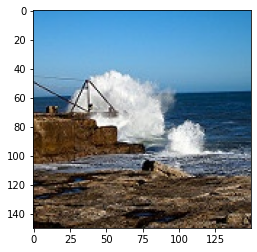

In [24]:
plt.imshow(mpimg.imread('data/Scene_Classification/seg_test/seg_test/sea/20072.jpg'))
img = load_image('/sea/20072.jpg')
predict(img)